# Bloco 3

<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 3. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. Neste bloco, as discentes estão utilizando métodos de aprendizado de máquina não-supervisado, isto é, este bloco possui dados não rotulados que o algoritmo deve tentar entender por conta própria. O grupo desenvolvedor é composto pelas discentes:
</p>


   <ul>
<li> 
Isabela Bento Beneti </li>
<li>
Monyque Karoline de Paula Silva </li>
<li>
Sofia Baccega C.C. de Oliveira </li>
<li>
Sophia Figueiredo Michel </li>
    </ul>

<hr>

### **COLETA DE DADOS**

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree, utils, preprocessing
from itertools import product
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
#Dados do cerrado brasileiro, armazenados mensalmente em csv
arquivos = ['janeiro_2021.csv','fevereiro_2021.csv','março_2021.csv','abril_2021.csv','maio_2021.csv','junho_2021.csv','julho_2021.csv','agosto_2021.csv','setembro_2021.csv','outubro_2021.csv','novembro_2021.csv','dezembro_2021.csv','janeiro.csv','fevereiro.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv','agosto.csv','setembro.csv','outubro.csv','novembro.csv']

In [3]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [4]:
meses = read_csv(arquivos)

In [5]:
# Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [6]:
## Para rodar o código pela primeira vez, descomente essas linhas

meses.drop(columns=['estado', 'municipio', 'pais', 'bioma'], axis = 1, inplace=True)

In [7]:
meses['satelite']= meses['datahora']
meses['satelite'] = meses['satelite'].str[11:13] #criando coluna "hora" a partir de "data_hora_gmt"
meses['datahora'] = meses['datahora'].str[5:7] #criando coluna "mes" a partir de "data_hora_gmt"
meses_fogo = meses['riscofogo'] > 0
meses = meses[meses_fogo]
meses.rename(columns={'satelite': 'hora'}, inplace= True)
meses.rename(columns={'datahora': 'mes'}, inplace = True)
meses.describe

<bound method NDFrame.describe of         mes hora  diasemchuva  precipitacao  riscofogo  latitude  longitude  \
0        01   16          6.0          0.00       0.70 -13.15300  -45.51600   
1        01   16       -999.0          0.10       0.80  -2.73600  -42.20700   
2        01   16          6.0          2.10       0.90 -14.35500  -45.87300   
4        01   16          7.0          0.20       0.90 -12.87100  -44.84700   
6        01   17          0.0          0.20       0.20 -12.74193  -51.44371   
...      ..  ...          ...           ...        ...       ...        ...   
2997483  11   23         12.0          4.65       0.91 -21.07830  -48.40050   
2997484  11   23         11.0          4.06       0.98 -21.09900  -48.39570   
2997487  11   23          2.0          0.40       0.04  -9.69610  -44.58670   
2997488  11   23         12.0          4.65       0.91 -21.07830  -48.40050   
2997489  11   23         11.0          4.06       0.98 -21.09900  -48.39570   

           frp  


In [8]:
meses = meses.reset_index()
del meses['index']
display(meses)

,mes,hora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,01,16,6.0,0.00,0.70,-13.15300,-45.51600,65.1
1,01,16,-999.0,0.10,0.80,-2.73600,-42.20700,15.5
2,01,16,6.0,2.10,0.90,-14.35500,-45.87300,51.0
3,01,16,7.0,0.20,0.90,-12.87100,-44.84700,30.3
4,01,17,0.0,0.20,0.20,-12.74193,-51.44371,3.6
...,...,...,...,...,...,...,...,...
2232513,11,23,12.0,4.65,0.91,-21.07830,-48.40050,103.5
2232514,11,23,11.0,4.06,0.98,-21.09900,-48.39570,124.2
2232515,11,23,2.0,0.40,0.04,-9.69610,-44.58670,71.7
2232516,11,23,12.0,4.65,0.91,-21.07830,-48.40050,103.1


In [9]:
meses["mes"] = meses["mes"].astype(float)
meses["hora"] = meses["hora"].astype(float)
print(meses.dtypes)

mes             float64
hora            float64
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
dtype: object


<hr>

## REDUÇÃO DE DIMENSIONALIDADE

### PCA
<p align="justify"> Suponha-se que há um conjunto de dados de alta dimensionalidade com um grande número de recursos. Esta situação é incomoda, pois há uma série de problemas a respeito de dados com alta dimensionalidade, como por exemplo: o overfitting, não possibilitando uma boa previsão dos  dados. Logo, de modo é reduzir esta ocorrÊncia é necessário reduzir a dimensionalidade a fim de diminuir o grande número de recursos em nosso conjunto de dados. E como fazemos isso? Uma das soluções é por meio da ténica PCA!  </p>
<p align="justify"> A PCA é uma ténica de redução de dimensionalidade do aprendizado de máquina não-supervisionado  que transforma um conjunto de recursos em um conjunto de dados em um número menor de recursos chamados componentes principais, ao mesmo tempo em que tenta reter o máximo de informações possível no conjunto de dados original.
<p align="justify">Os componentes principais são vetores, mas não são escolhidos ao acaso. O primeiro componente principal é calculado de modo que explique a maior quantidade de variância nas características originais. O segundo componente é ortogonal ao primeiro e explica a maior quantidade de variância deixada após o primeiro componente principal. </p>
<p align="justify"> Neste Bloco, iremos aplicar a técnica de PCA a fim de reduzir a dimensionalidade do nosso conjunto de dados e analisar a eficiente deste! Vamos ver como isso funciona na prática?</p>

#### Parte I
Inicialmente estabelece-se as features a serem utilizadas e normaliza-se todos os dados a fim de se realizar a ténica. 

In [11]:
# Estabelecendo as features
FEATURES = ['diasemchuva', 'precipitacao', 'latitude', 'longitude', 'frp', 'mes','hora',]
# Normalizando os dados
X = meses.reindex(FEATURES, axis=1)
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

#### Parte II
Aplicando o PCA em duas dimensões, dada a componente 1: Número de dias sem chuva.

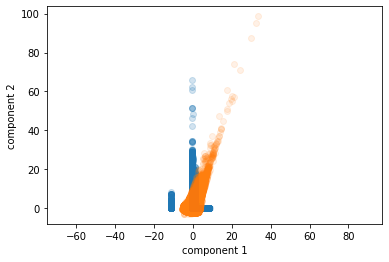

In [12]:
# Graficando o PCA
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

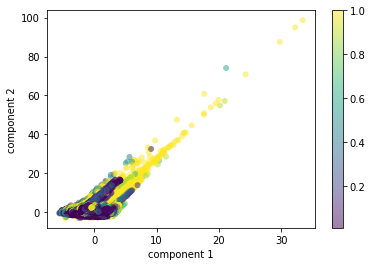

In [13]:
# Colorindo os pontos de acordo com o nosso target - risco de fogo, para entender se a PCA agrupou os dados de alguma maneira
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=meses["riscofogo"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

<p align="justify">  Nota-se que há o agrupamento dos dados, apesar destes não estarem muito bem definidos. A fim de analisar se a dimensionalidade auxilia nesta análise, realiza-se o plot tridimensional. </p>

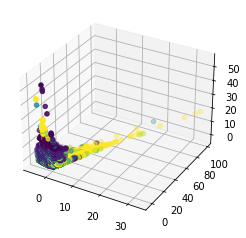

In [14]:
# Plotando gráfico 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=meses["riscofogo"].values)

#### Parte III
Vamos agora investigar o que cada componente principal levou em conta em relação as *features* originais. Para isso vamos averiguar a matriz de *loadings*:

In [15]:
# Matriz de loadings, para investigar o que cada componente principal levou em conta em relação as features originais
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
diasemchuva,-0.026547,-0.008720,-0.100120,0.921855,0.362926,0.000623,0.087533
precipitacao,-0.070913,-0.039921,0.834755,-0.113470,0.520497,0.107601,-0.034515
latitude,0.620100,-0.217364,-0.076359,-0.133355,0.187188,0.100972,0.706668
longitude,0.601319,-0.310659,-0.093687,0.020090,0.126009,0.197779,-0.691181
frp,0.222403,0.674911,0.128733,0.115484,-0.230679,0.641562,0.017575
mes,0.386506,0.075429,0.464269,0.266147,-0.516565,-0.540094,-0.001562
hora,0.222056,0.627200,-0.215487,-0.186947,0.475812,-0.485599,-0.117149


E posteriormente, graficar a variância das componentes!

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

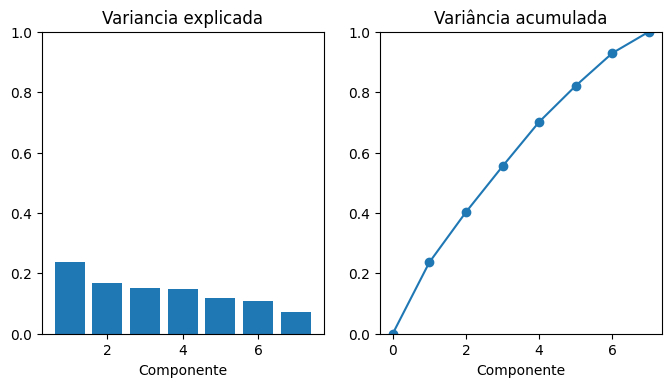

In [16]:
# graficando a variância explicada e acumulada
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)

<p align="justify"> A variância explicada nos mostra que ambas as componentes apresentam valores próximos para a captação de dados, mas analisando extritamente, observa-se que a PC1 é a principal para capturar os dados, enquanto as demais tem participações parecidas. Entretanto, acredita-se que não é necessário utilizar de todas as componentes, sendo o uso de três componentes uma boa amostra para a análise de dados. </p>

### **Vamos analisar essa hipotése?**

Vamos criar um novo DataFrame com os dados normalizados!

In [17]:
meses_scaled = pd.DataFrame(X_norm,columns = FEATURES) #Criando o DataFrame a partir com dados normalizados, que é um array de numpy
meses_scaled = pd.concat([meses_scaled,pd.Series(meses['riscofogo']).reset_index(drop=True)],axis=1) #Concatenando a coluna 'price' ao DataFrame
print(meses_scaled.head(10)) #Exibindo as 10 primeiras linhas do dataset normalizado

   diasemchuva  precipitacao  latitude  longitude       frp       mes  \
0    -0.315347     -0.181387 -0.311375   0.543347  0.546412 -4.447206   
1   -11.259604     -0.110408  2.046899   1.479169 -0.209288 -4.447206   
2    -0.315347      1.309171 -0.583492   0.442384  0.331586 -4.447206   
3    -0.304457     -0.039429 -0.247533   0.732548  0.016203 -4.447206   
4    -0.380685     -0.039429 -0.218314  -1.133075 -0.390595 -4.447206   
5    -0.369796     -0.181387  1.331968   0.338309 -0.005127 -4.447206   
6    -0.282677     -0.181387 -0.427511   0.932778  0.907503 -4.447206   
7    -0.369796     -0.181387 -1.009792  -1.445612 -0.350982 -4.447206   
8    -0.380685      0.457424 -0.730308  -0.977800 -0.361647 -4.447206   
9    -0.326236     -0.181387 -0.329898   0.228895 -0.372312 -4.447206   

       hora  riscofogo  
0  0.550131        0.7  
1  0.550131        0.8  
2  0.550131        0.9  
3  0.550131        0.9  
4  0.720570        0.2  
5  0.550131        1.0  
6  0.550131        0.

In [18]:
from sklearn.decomposition import PCA
import numpy as np

X = meses_scaled[FEATURES] #Definindo o X como as features
y = meses_scaled['riscofogo']  #Definindo o y como o target

pca = PCA(n_components=3) #Calculando o PCA para três componentes
pca.fit(X)                #Ajustando o PCA
X_pca = pca.transform(X)  #Realizando o PCA

In [19]:
print(np.sum(pca.explained_variance_ratio_)) #Calculando a variância explicada acumulada para as três componentes principais

0.554887644052214


##### Conclusões
<p align="justify"> A variância explicada com três componentes é de 86,38%, muito alta sendo que usamos a metade das features. Agora vamos analisar estes dados em um modelo de treinamento de previsão!! </p>

<hr>

### Modelo de Previsão - Regressão

Vamos dividir o dataset em teste e treino! Note que estamos fazendo de uma maneira diferente agora, com apenas um comando.

##### Divisão do dataset em teste e treino

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pca,                                           #Dados das componentes principais do PCA
    y,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)             

In [21]:
meses_pca_train = pd.DataFrame(X_pca,columns=['PC1', 'PC2', 'PC3']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
meses_pca_train['riscofogo'] = y                                        #Adiciona a coluna preço, com os dados de y
print(meses_pca_train.head(20))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = meses_pca_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))             

         PC1       PC2       PC3  riscofogo
0  -1.297310  0.180754 -2.160446        0.7
1   0.851634 -1.122428 -1.565304        0.8
2  -1.702653  0.122692 -0.875900        0.9
3  -1.274961 -0.255601 -2.102367        0.9
4  -2.427959  0.157855 -2.056446        0.2
5  -0.527069 -0.498241 -2.269493        1.0
6  -1.055319  0.329109 -2.148416        0.5
7  -3.122914  0.357611 -2.083688        0.1
8  -2.687281  0.241455 -1.611591        1.0
9  -1.663357 -0.237116 -2.260820        1.0
10 -2.204285  0.197386 -2.180085        0.3
11 -1.682945 -0.095406 -2.238637        0.9
12 -4.559001  1.079840 -1.994612        0.7
13 -1.929905 -0.135469 -1.936013        1.0
14 -1.926981 -0.134372 -1.935927        1.0
15 -1.921211 -0.110854 -1.932701        1.0
16 -1.901661 -0.058849 -1.925726        1.0
17 -4.509083  1.133372 -1.988946        0.5
18 -1.934185 -0.143929 -2.240179        0.8
19 -4.531276  1.069476 -1.997561        0.6
              PC1     PC2     PC3  riscofogo
PC1        1.0000 -0.0016  0.00

#### Parte I - Aplicação do Modelo Linear


In [22]:
from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_linear.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) #Cálculo do RMSE

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 0.21262107228074043.


##### Conclusões
<p align="justify"> Não é um bom modelo para este dataset, apresentando 0.21 de erro de previsão, aproximadamente, sendo um número de erro maior ao comparado com os dados sem a utilização de PCA. </p>

#### Parte II - Aplicação do Modelo de Floresta Aleatória

In [24]:
from sklearn.ensemble import RandomForestRegressor

# cria o modelo
SEMENTE_ALEATORIA = 42875
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42875)

In [25]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_rf.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE}.")

O RMSE do modelo árvore de decisão foi de 0.12787643120086864.


##### Conclusões
<p align="justify">  Este é um modelo muito bom, melhorando a previsão se comparado com o modelo linear e previsão próxima ao estabelecido sem a utilização de PCA. Isso que já era esperado devido as análises feitas no Bloco anterior quanto ao modelo de Floresta aleatória.</p>

#### Parte III - Aplicação do Modelo KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
SEMENTE_ALEATORIA = 42875
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [27]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_knn.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE de Knn de decisão foi de {RMSE}.")

O RMSE de Knn de decisão foi de 0.14414747165914416.


##### Conclusões
<p align="justify">  Este é um modelo muito bom, mas não é melhor como comparado com o de Floresta Aleatória, sendo uma situação interessante, pois quando há todas as componentes ou não há a utilização de PCA, os dados são melhor previstos neste sistema de modelo. Uma possibildade desta ocorrência é devido as componentes terem todos valores próximas, logo, se tivéssemos mais componentes sendo utilizadas, melhor seria a previsão. </p>

<hr>

## Cluesterização K-Means

<p align="justify">  Este método realiza agrupamento dos dados por meio do cáculo das médias dos valores de cada cluster e sua variância para identificar os grupos. De modo a realizar esse agrupamento, inicialmente-se normaliza-se os dados e define a quantidade de agrupamentos a ser realizado. </p>

#### Parte I - Parametrizações 
Definição dos atributos e normalização dos dados.

In [50]:
df = meses
FEATURES = ['diasemchuva', 'precipitacao', 'latitude', 'longitude', 'frp', 'mes', 'hora']
X = df.reindex(FEATURES, axis=1)

In [51]:
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

#### Parte II - Agrupamento com 3 grupos/clusters

In [52]:
n_clusters=3  #Define três clusters

kmeans = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=300,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_kmeans = kmeans.fit_predict(X_norm) #Fita o K-Means

Com o K-Means *fittado*, vamos então plotar os dados e colorir de acordo com os clusters:

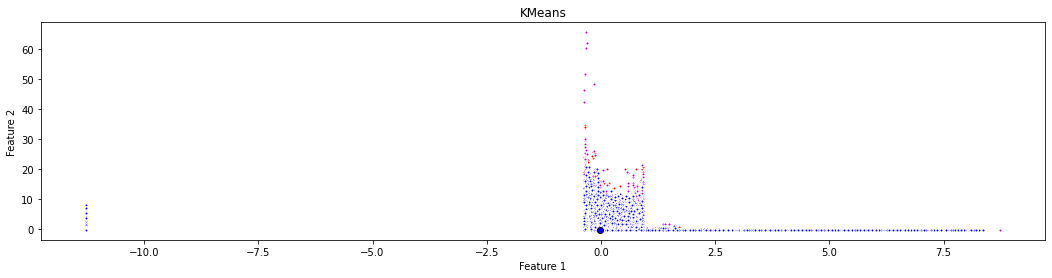

In [53]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_norm, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        X_norm[my_members, 0],    #Coordenada do eixo-x
        X_norm[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

<p align="justify">  Observa-se o agrupamento dos dados em três grupos, entretanto, os dados estão bem dispersos e não se consegue realizar boas previsões deste modo. Logo, o que podemos fazer nesta aplicação? A redução da dimensionalidade por meio do PCA - como trabalhamos anteriormente! Vamos analisar? </p>

#### Parte II - Aplicação do PCA

In [54]:
# Transformação do pca
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

In [55]:
# Aplicação do PCA com o método de cluesterização
n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

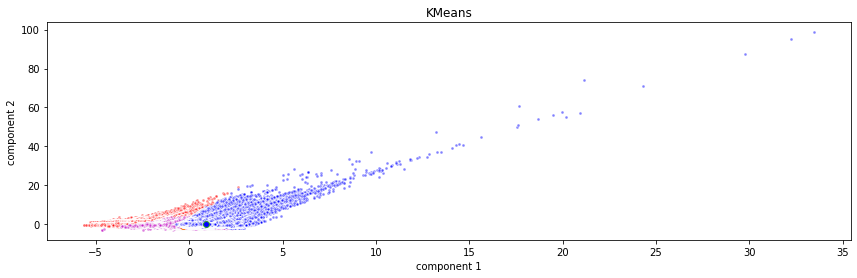

In [56]:
#Plot dos dados com as duas componentes principais
centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

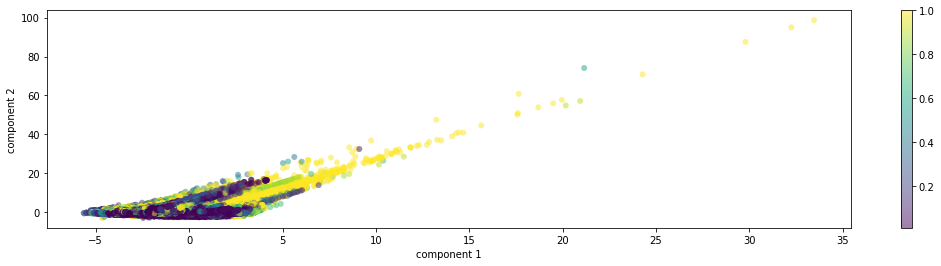

In [57]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df["riscofogo"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

<p align="justify">  Observa-se que o agrupamento apesar de próximo, não ficou totalmente similar com o método de PCA abordado. Isto pode ser atribuido ao próprio conjunto de dados que não está bem dividido e sobreposto como visto no PCA, uma outra sugestão para a melhora da representação é o aumento de clurters a serem realizados, e isso será o nosso próximo tópico de trabalho! </p>

#### Parte III - Definição da quantidade de cluesters

<p align="justify">  Como discutido anteriormente, talvez o aumento de cluerster seja mais interessante para o nosso modelo. Mas, como podemos observar isso? Por meio do método do cotovelo! </p>
O  método consiste no cálculo da *Within-Cluster-Sum of Squared Errors* (WSS) em função do número de clusters *k*. Mas o que é esta WSS? Basicamente a distância entre todos os pontos do cluster com todos os outros pontos do cluster, definida por:<br>

<ul>
$D_k=\sum_{x_i\in c_k}\sum_{x_j\in c_k} |x_i-x_j|^2$,<br>
onde $c_k$ é o cluster $k$, $x_i\in c_k$ e $x_j\in c_k$ os pontos do cluster $k$. 

</ul>
<p align="justify"> Isso dirá o quão compacto é o cluster, sendo que, no limite extremo do número de clusters ser igual ao número de pontos, esse valor vai a zero.</p>
<p align="justify">  O número que identifica a quantidade ideal de cluester é definida por meio da observação do gráfico, o ponto em que se assemleha a um cotovelo é o ideal,  porque depois de um certo número de clusters, a WSS passará a diminuir lentamente, então queremos um número de clusters que diminua a WSS bastante, e não da região que faz diminuir pouco. 

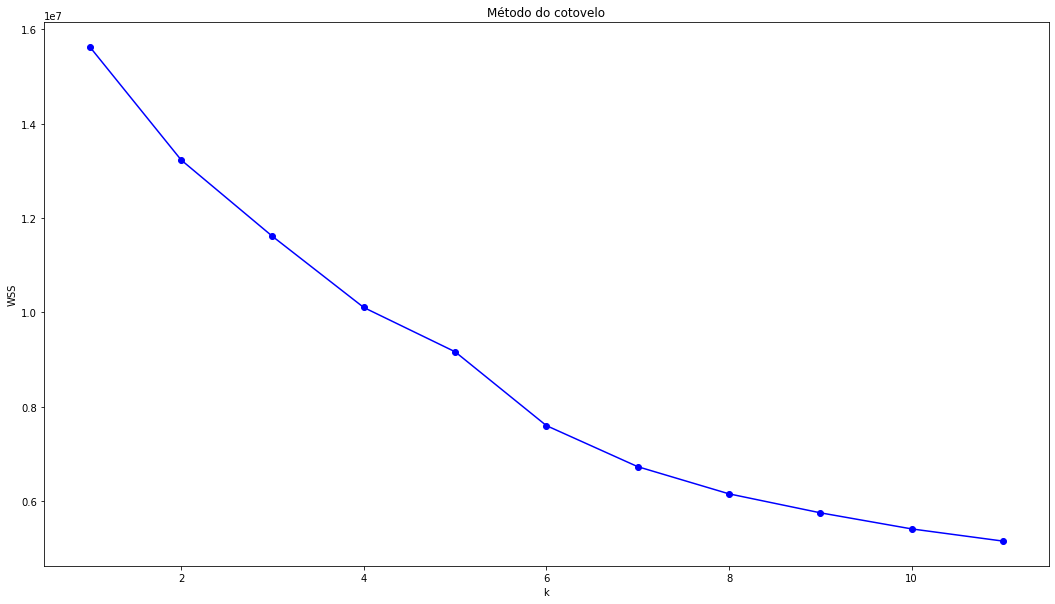

In [58]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,12): #Vamos fazer para 1 a 11 clusters.
    kmeans = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=13, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )
    y_kmeans = kmeans.fit_predict(X_pca) #Fita o K-Means
    WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,12), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()                               #Mostra o gráfico

<p align="justify"> Neste gráfico, observa-se que os pontos ideais para se realizar o cluster está próximo de 6-8, e de modo a identificar entre estes dois valores é o número ideal, realiza-se o plot:

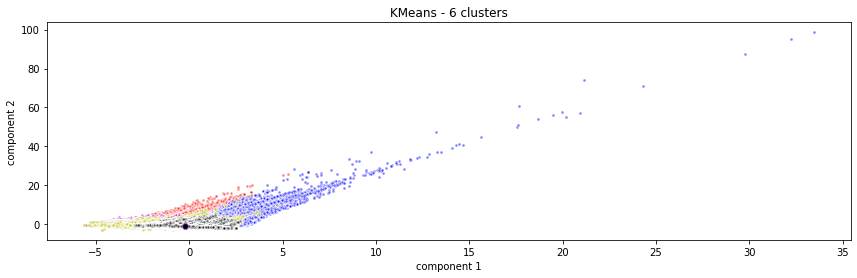

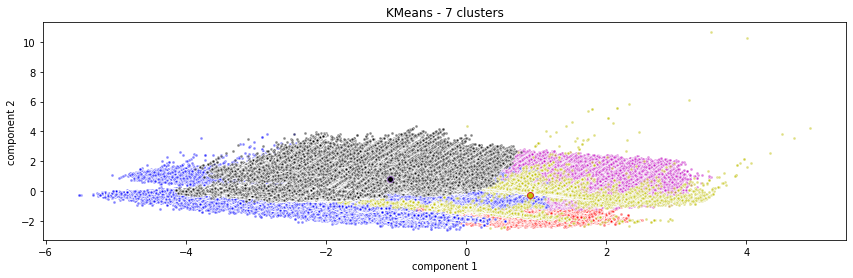

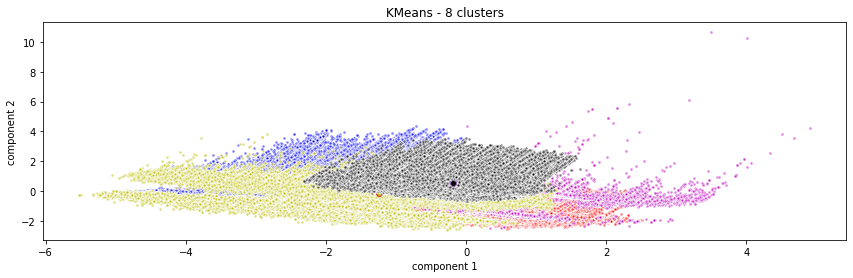

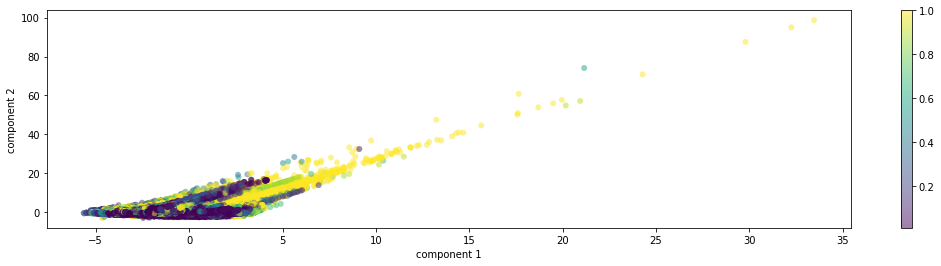

In [59]:
for numberofclusters in range(6,9):

    n_clusters=numberofclusters

    kmeans = KMeans(
        n_clusters=n_clusters, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )

    y_kmeans = kmeans.fit_predict(X_pca)

    centroids = kmeans.cluster_centers_
    labels = pairwise_distances_argmin(X_pca, centroids)
    colors = ["r", "m", "b", "y", "k"]

    fig = plt.figure(figsize=(14.4, 4))
    ax = fig.add_subplot()

    for k, col in zip(range(n_clusters), colors):
        my_members = labels == k
        cluster_center = centroids[k]
        ax.plot(
            X_pca[my_members, 0],
            X_pca[my_members, 1],
            "w", 
            markerfacecolor=col,
            marker=".",
            alpha = 0.5,
            linewidth=0)
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markersize=6,
            alpha = 1.0,
            linewidth=0
        )
    title = 'KMeans - ' + str(numberofclusters) + " clusters"
    ax.set_title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2')

    plt.show()


fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df["riscofogo"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Dados os plots realizados, o que mais se aproxima do desejado é quando há 7 clusters.

#### Parte IV - Plot 3D

Os dados podem ser observados por meio dos gráficos tridimensionais.

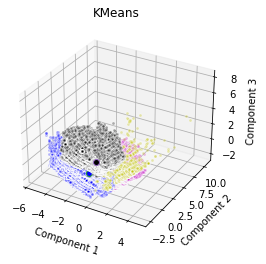

In [60]:
n_clusters=7

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure() #figsize=(22, 10))
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0], 
        X_pca[my_members, 1],
        X_pca[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        #markeredgecolor="k",
        markersize=6,
    )

ax.set_title("KMeans")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()


### É possível realizar outros métodos de Cluster?

<p align="justify">  Sim. O KNN é apenas um dos tipos possíveis de Cluster, neste tópico apresenta-se outro tipo de agrupamento: Mini Batch K-means. </p>

### Mini Batch K-means


<p align="justify">  Com o aumento do tamanho dos conjuntos de dados sendo analisados, o tempo de computação do K-means aumenta devido à sua restrição de precisar de todo o conjunto de dados na memória principal. De modo a otimizar este processo, um dos métodos utilizados atualmente é o algoritmo K-means Mini batch. </p>
<p align="justify">  A sua atuação consiste em pegar pequenos conjuntos(lotes) escolhidos aleatoriamente para a realização da interação. Cada dado do conjunto é atribuido aos clusters, logo, ele atualiza os locais nos centroides do cluster com base nos novos pontos do conjunto, sendo esta atualização mais rápida que o agrupamento normacional do KNN </p>

#### Parte I - Parametrizações do Mini Batch K-means

In [61]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
  
# Definição do nº de clusters
n_clusters = 7
  
#Definição dos vizinhos
batch_size = 45

#Categorizações do cluster
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = n_clusters,
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
y_mbk = mbk.fit_predict(X_norm) #Fita o K-Means

In [62]:
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(X_norm, mbk_means_cluster_centers)
  
# print the labels of each data
print(mbk_means_labels)

[0 0 0 ... 5 4 4]


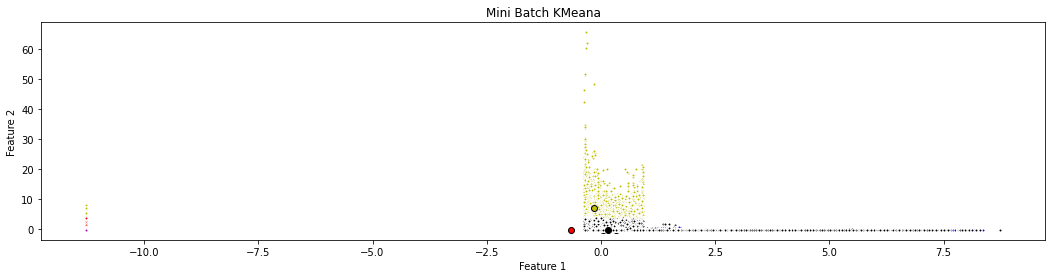

In [63]:
centroids =mbk.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_norm, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        X_norm[my_members, 0],    #Coordenada do eixo-x
        X_norm[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("Mini Batch KMeana")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

#### Parte II - Aplicação do PCA

In [64]:
# Aplicação do PCA com o método de cluesterização
y_mbk= mbk.fit_predict(X_pca)

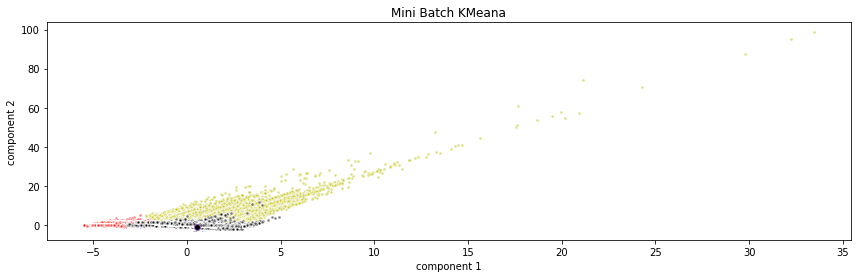

In [65]:
n_clusters = 7
centroids =mbk.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_pca, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("Mini Batch KMeana")  #Título do gráfico
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

#### Parte III - Definição da quantidade de cluesters

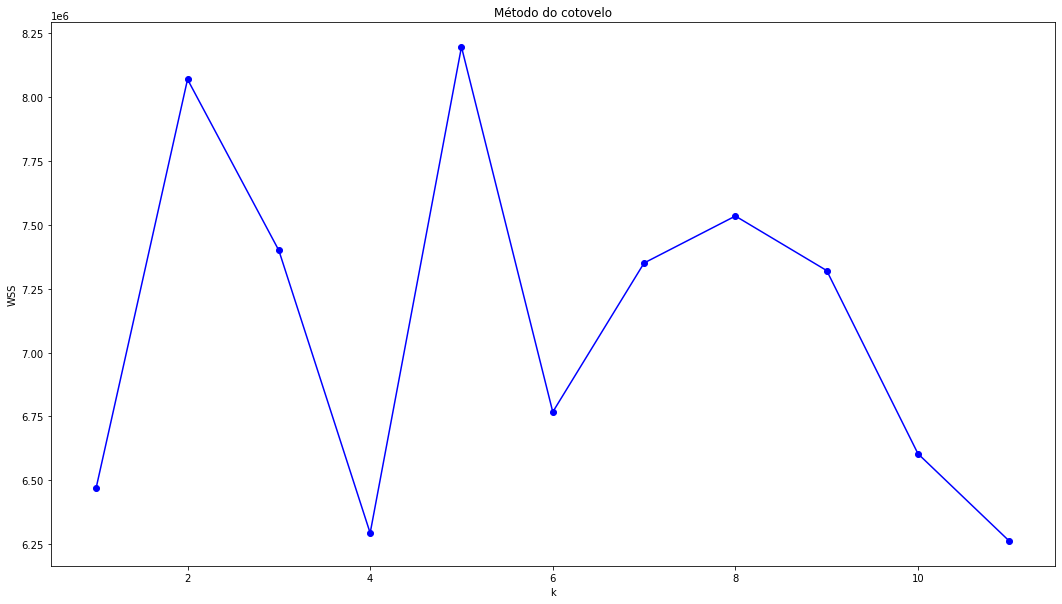

In [66]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,12): #Vamos fazer para 1 a 11 clusters.
    mbk = MiniBatchKMeans(init ='k-means++', 
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
    y_mbk = mbk.fit_predict(X_pca) 
    WSS.append(mbk.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,12), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()          

Não foi possível a identificação do melhor padrão, pois não se identificou o método de cotovelo neste gráfico devido a aleatoriedade de disposição de pontos.

#### Parte IV - Plot 3D

Os resultados também podem ser observados por meio dos gráficos tridimensionais.

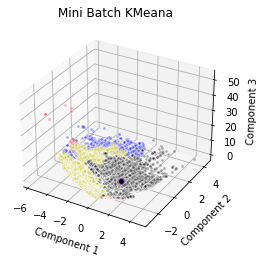

In [67]:
mbk = MiniBatchKMeans(
    init ='k-means++', n_clusters = n_clusters,
    batch_size = batch_size, n_init = 10,
    max_no_improvement = 10, verbose = 0)

y_mbk = mbk.fit_predict(X_pca) 

centroids = mbk.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure() #figsize=(22, 10))
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0], 
        X_pca[my_members, 1],
        X_pca[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        #markeredgecolor="k",
        markersize=6,
    )

ax.set_title("Mini Batch KMeana")  #Título do gráfico
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()


##### Conclusões

Observou-se que os métodos não apresentam  muita divergência, apenas que o método Mini Batch KMeans em comparação do KMeans é mais rápido e que não foi possível identificar qual seria o melhor número de clusters. Apenas que ele apresenta melhores resultados com conjuntos de dados maiores e maiores números de clusters.

<hr>

## DETECÇÃO DE OUTLIERS

### LOF

O Local Outlier Factor (LOF) é um algoritmo de detecção de outliers que utiliza a distância entre os pontos para realizar a sua detecção.

Este algoritmo usa o conceito dos $k$ vizinhos mais próximos que vimos no algoritmo de aprendizado supervisionado $k$​-NN. Primeiramente definimos o conjunto $N_k(A)$ que contém todos os $k$ vizinhos do exemplo $A$. Note que pelo motivo de poder haver empate entre as distâncias, o conjunto $N_k(A)$ pode ter mais que $k$ itens.


#### Parte I - Hiperparametros N_vizinhos = 10

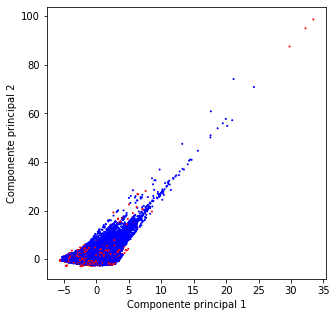

In [68]:
from sklearn.neighbors import LocalOutlierFactor

# precisamos indicar a fração de outliers, vamos estimar que seja automática
FRACAO_OUTLIERS = 'auto'

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS = 10

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

#### Parte II - Hiperparametros N_vizinhos = 20

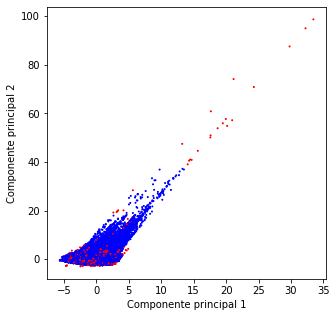

In [69]:
from sklearn.neighbors import LocalOutlierFactor

# precisamos indicar a fração de outliers, vamos estimar que seja automática
FRACAO_OUTLIERS = 'auto'

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS = 20

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

#### Parte III - Hiperparametros N_vizinhos = 30

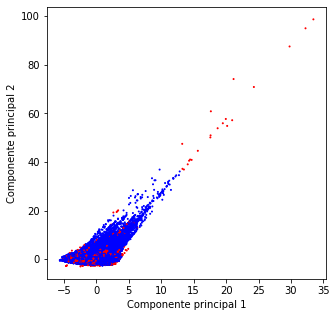

In [70]:
from sklearn.neighbors import LocalOutlierFactor

# precisamos indicar a fração de outliers, vamos estimar que seja automática
FRACAO_OUTLIERS = 'auto'

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS = 30

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

##### Conclusões sobre os hiperparâmetros

Observa-se que a identificação de valores anômalos aumenta conforme há o aumento dos vizinhos e consequentemente, maior análise das distâncias entre os pontos. Logo, utiliza-se de um número maior para identificar os números próximos e ver mais padrões, por isso o número de anômalos é menor.

## IF

O Isolation Forest (IF) é um algoritmo de detecção de valores anômalos que utiliza uma floresta de árvores de decisão para realizar a sua detecção.

Este algoritmo usa conceitos do algoritmo de floresta aleatória que vimos durante o bloco de aprendizado supervisionado. A ideia por trás deste algoritmo é que valores anômalos são mais fáceis de serem isolados utilizando árvores de decisão do que valores que não são anômalos.

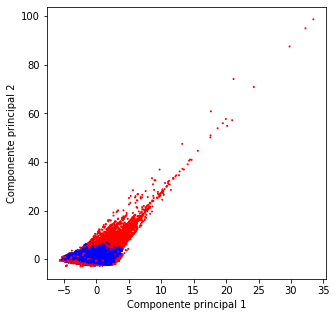

In [71]:
# precisamos indicar a fração de outliers, vamos estimar que seja 1%
from sklearn.ensemble import IsolationForest
FRACAO_OUTLIERS = 0.01

CORES = np.array(["red", "blue"])

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

### Conclusões

<p align="justify">  
Nota-se que os pontos de identificação dos valores anômalos são distoantes, acredita-se que o metódo de identificação LOF seja uma melhor inteface para o projeto, devido a utilização de dados de climatologia e localização geográfica. Retirar os pontos que estão em crescente do gráfico não parece interesse já que eles apresentam um padrão de crescimento dos números de dia sem chuva e precipitação, então não se tem um bom panorama da região de interesse, além de que os valores crescentes são de suma relevância para entender o comportamento do risco de fogo do local, já que quanto maior os números de dias sem chuva, maior a chance de risco de fogo, sendo um dado de suma relevância. </p>